
### BY: JAINEEL PARMAR
### TASK 1: Prediction using Unsupervised Machine Learning (GRIP - The Sparks Foundation)


### Workshop - 1: K- Means Clustering
This notebook will walk through some of the basics of K-Means Clustering.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

### Read this before starting to code: https://scikit-learn.org/stable/modules/clustering.html

In [6]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [7]:
# Load the iris dataset
iris_df = pd.read_csv("Iris.csv")
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


To check for null values.

In [8]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

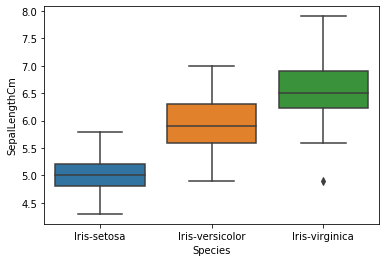

In [10]:
a = sns.boxplot(x = "Species", y = "SepalLengthCm", data = iris_df)

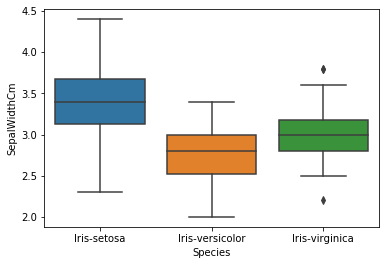

In [11]:
b = sns.boxplot(x = "Species", y = "SepalWidthCm", data = iris_df)

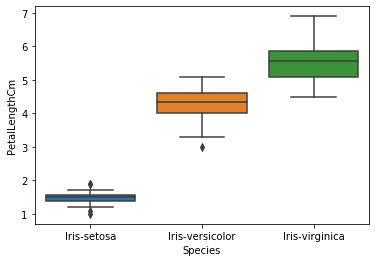

In [12]:
c = sns.boxplot(x = "Species", y = "PetalLengthCm", data = iris_df)

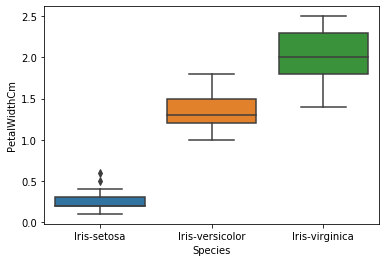

In [14]:
d = sns.boxplot(x = "Species", y = "PetalWidthCm", data = iris_df)

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [16]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values
print(x)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

LINK TO KNOW ABOUT KMeans :- https://realpython.com/k-means-clustering-python/
        
Here are the parameters used in this example:

(init) controls the initialization technique. 
The standard version of the k-means algorithm is implemented by setting init to "random". 
Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

(n_clusters) sets k for the clustering step. This is the most important parameter for k-means.

(n_init) sets the number of initializations to perform. 
This is important because two runs can converge on different cluster assignments. 
The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

(max_iter) sets the number of maximum iterations for each initialization of the k-means algorithm.

(random_state) in Kmeans function of sklearn mainly helps to.
Start with same random data point as centroid if you use Kmeans++ for initializing centroids. 
Start with same K random data points as centroid if you use random initialization.

In [17]:
from sklearn.cluster import KMeans

w = [] #Empty List

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    
#   To train our model , we use kmeans.fit() here = https://stackoverflow.com/questions/56911872/why-we-use-kmeans-fit-function-in-kmeans-clustering-method
    kmeans.fit(x)
    
#   The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares
    w.append(kmeans.inertia_)

In [18]:
w

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17762.657226173542,
 11423.238080088988,
 7909.530673076923,
 5881.448116883117,
 4562.7800793650795,
 3579.72056127451,
 2968.491432665374]

### ELBOW METHOD

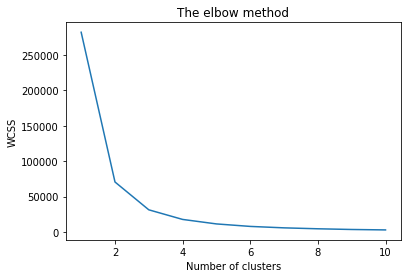

In [20]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1, 11), w)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **'3'**.

In [21]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

# fit_predict is usually used for unsupervised machine learning transductive estimator. 
# Basically, fit_predict(x) is equivalent to fit(x). predict(x) .
y_kmeans = kmeans1.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


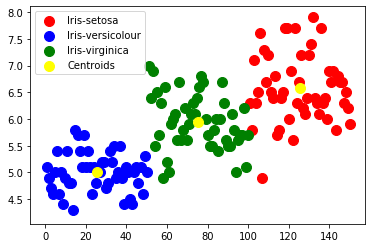

In [26]:
# Visualising the clusters - On the first two columns

# print(x[y_kmeans])
# print(x[y_kmeans == 0])
# print(x[y_kmeans == 0, 0])
# print(x[y_kmeans == 0, 1])

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
# Final locations of the centroid
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

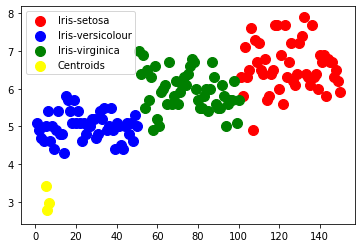

In [27]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
# Final locations of the centroid
plt.scatter(kmeans1.cluster_centers_[:, 1], kmeans1.cluster_centers_[:, 2], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [28]:
# The number of iterations required to converge
kmeans1.n_iter_

5

This concludes the K-Means Workshop.